### 小売り顧客のクラスタリング

In [5]:
import pandas as pd
import seaborn as sns

import japanize_matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [6]:
# カラム名の日本語化
column_names = [
    "販売チャネル",
    "地域",
    "新鮮品",
    "乳製品",
    "食料品",
    "冷凍食品",
    "洗剤・紙製品",
    "惣菜",   
]

In [7]:
# データの読み込み
df = pd.read_csv('Wholesale customers data.csv', header=0, names=column_names)

In [8]:
df.head(10)

,販売チャネル,地域,新鮮品,乳製品,食料品,冷凍食品,洗剤・紙製品,惣菜
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


### データ確認

In [9]:
# データの形状確認
df.shape

(440, 8)

In [10]:
# 欠損値を確認
df.isnull().sum()

販売チャネル    0
地域        0
新鮮品       0
乳製品       0
食料品       0
冷凍食品      0
洗剤・紙製品    0
惣菜        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   販売チャネル  440 non-null    int64
 1   地域      440 non-null    int64
 2   新鮮品     440 non-null    int64
 3   乳製品     440 non-null    int64
 4   食料品     440 non-null    int64
 5   冷凍食品    440 non-null    int64
 6   洗剤・紙製品  440 non-null    int64
 7   惣菜      440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [12]:
# カテゴリカル変数の型変換
categorical_columns = ['販売チャネル', '地域']
df[categorical_columns] = df[categorical_columns].astype('object')

In [13]:
print(df.dtypes)

販売チャネル    object
地域        object
新鮮品        int64
乳製品        int64
食料品        int64
冷凍食品       int64
洗剤・紙製品     int64
惣菜         int64
dtype: object


In [14]:
df.describe()

,新鮮品,乳製品,食料品,冷凍食品,洗剤・紙製品,惣菜
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<AxesSubplot:>

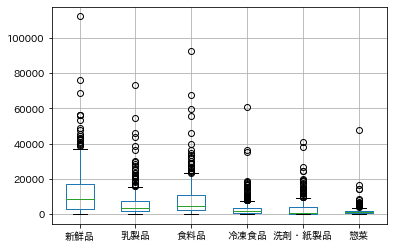

In [15]:
# 外れ値の確認
df.boxplot()

In [16]:
# 四分位数を計算
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# IQRに基づいて外れ値のしきい値を設定
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 外れ値を除外
df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

<AxesSubplot:>

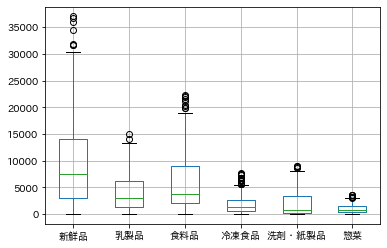

In [17]:
df_filtered.boxplot()

In [18]:
df = df_filtered

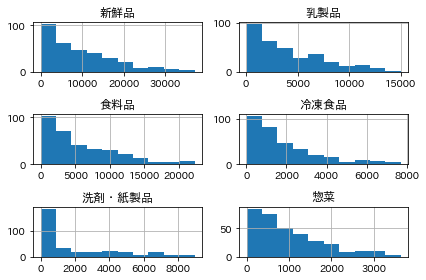

In [19]:
df.hist()
plt.tight_layout();

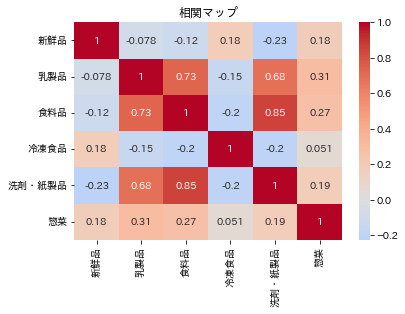

In [20]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,  annot=True, cmap='coolwarm', center=0)
plt.title('相関マップ')
plt.show()

### 標準化

In [21]:
# 数値データの抽出
numerical_df = df.select_dtypes(include='int')
numerical_df.head()

,新鮮品,乳製品,食料品,冷凍食品,洗剤・紙製品,惣菜
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
3,13265,1196,4221,6404,507,1788
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545


In [22]:
scaler = StandardScaler()
scaled_numerical_df = pd.DataFrame(scaler.fit_transform(numerical_df), columns=numerical_df.columns)
scaled_numerical_df.head()

,新鮮品,乳製品,食料品,冷凍食品,洗剤・紙製品,惣菜
0,0.383041,1.652898,0.334978,-0.967004,0.305053,0.390465
1,-0.305588,1.698756,0.733878,-0.059255,0.569139,0.922591
2,0.456174,-0.866283,-0.328862,2.662821,-0.619462,0.937169
3,-0.016491,1.236906,-0.148989,-0.701951,-0.069958,0.527749
4,0.316411,-0.269838,0.218508,-0.811022,0.503864,-0.572949


In [23]:
# カテゴリカル変数のダミー変数化
df_dummies = pd.get_dummies(df[categorical_columns], drop_first=True, dtype = 'uint8').reset_index()
df_dummies.head()

,index,販売チャネル_2,地域_2,地域_3
0,0,1,0,1
1,1,1,0,1
2,3,0,0,1
3,5,1,0,1
4,6,1,0,1


In [24]:
# 標準化した数値データとダミー変数を結合
standardized_df = pd.concat([scaled_numerical_df, df_dummies], axis=1)
standardized_df.head()

,新鮮品,乳製品,食料品,冷凍食品,洗剤・紙製品,惣菜,index,販売チャネル_2,地域_2,地域_3
0,0.383041,1.652898,0.334978,-0.967004,0.305053,0.390465,0,1,0,1
1,-0.305588,1.698756,0.733878,-0.059255,0.569139,0.922591,1,1,0,1
2,0.456174,-0.866283,-0.328862,2.662821,-0.619462,0.937169,3,0,0,1
3,-0.016491,1.236906,-0.148989,-0.701951,-0.069958,0.527749,5,1,0,1
4,0.316411,-0.269838,0.218508,-0.811022,0.503864,-0.572949,6,1,0,1


### k-meansによるクラスタリング

#### エルボー法

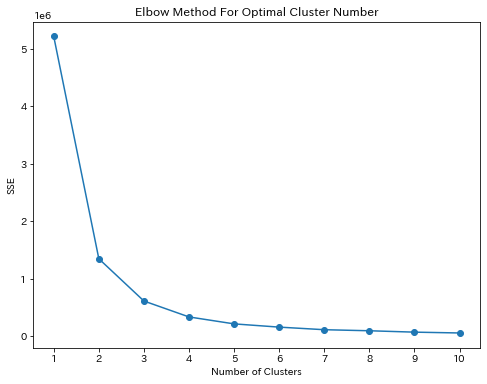

In [43]:
from sklearn.cluster import KMeans

# クラスタ数のリスト
cluster_range = range(1, 11)  # 1から10までのクラスタ数を試す

# 各クラスタ数でのSSEを保存するリスト
sse = []

# クラスタ数を変えながらKMeansクラスタリングを実行し、SSEを計算
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init='auto',  random_state=0) 
    kmeans.fit(standardized_df)
    sse.append(kmeans.inertia_)  # inertia_属性にはSSEが保存されている

# エルボー法のプロットを作成
plt.figure(figsize=(8,6))
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method For Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.xticks(cluster_range)
plt.show()

- エルボー法よりクラスター数は2が適切と判断

In [44]:
# モデル作成
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init='auto',  random_state=0) 

In [45]:
# クラスタリング結果をデータフレームに追加
df['Cluster'] = kmeans.fit_predict(scaled_numerical_df)
df.head()

,販売チャネル,地域,新鮮品,乳製品,食料品,冷凍食品,洗剤・紙製品,惣菜,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
3,1,3,13265,1196,4221,6404,507,1788,0
5,2,3,9413,8259,5126,666,1795,1451,1
6,2,3,12126,3199,6975,480,3140,545,0


In [46]:
# 各クラスタの平均値を計算
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)

# クラスタに分けられた各グループの平均値を表示
cluster_summary

,新鮮品,乳製品,食料品,冷凍食品,洗剤・紙製品,惣菜
Cluster,,,,,,
0,10372.919283,2324.529148,3004.524664,2147.645740,625.408072,843.704036
1,7858.486239,7748.165138,11749.495413,1280.798165,4687.284404,1370.330275


### 結果の可視化

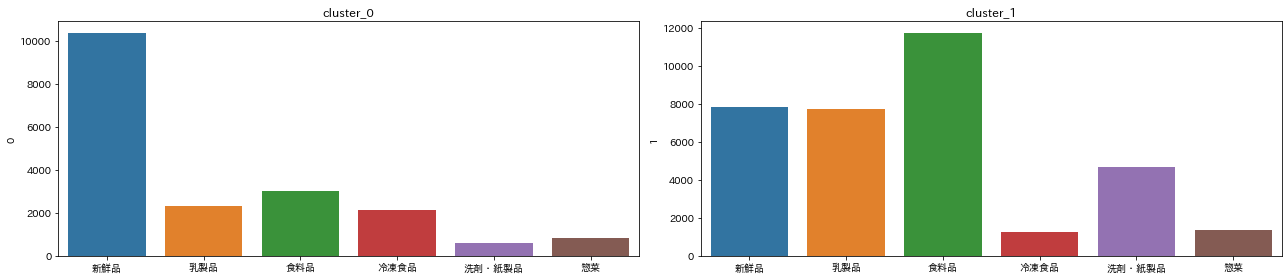

In [47]:
# クラスターごとに可視化して確認
plt.figure(figsize=(18, 4))

for n in range(kmeans.n_clusters):
    plt.subplot(1, kmeans.n_clusters, n+1)
    plt.title(f'cluster_{n}')
    sns.barplot(x=cluster_summary.columns, y=cluster_summary.loc[n], )
    #plt.ylim(0, 5)
    plt.tight_layout()

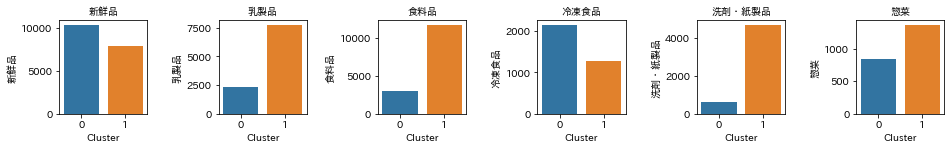

In [48]:
# 図のサイズを設定
plt.figure(figsize=(18, 6))

# 各変数に対してバープロットを生成
for n, col in enumerate(cluster_summary.columns):
    plt.subplot(3, 8, n+1)

    # タイトルのフォントサイズを小さくする
    plt.title(f'{col}', fontsize=10)

    # バープロットを描画
    sns.barplot(x=cluster_summary.index, y=cluster_summary[col])

    # y軸のリミットを設定
    #plt.ylim(0, 10)

# サブプロット間のスペースを調整
plt.tight_layout(pad=2.0)  # padパラメータでスペースを調整

# 図を表示
plt.show()

- Cluste0は新鮮品と冷凍食品の購入が多い
- Cluster1は乳製品、食料品、洗剤・紙製品、惣菜の購入が多い

#### 積み上げ棒グラフによる可視化

[Text(0, 0, 'cluster0'), Text(1, 0, 'cluster1'), Text(2, 0, 'cluster2')]

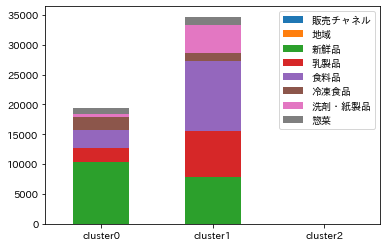

In [49]:
clusterinfo = pd.DataFrame()

# 各クラスタの平均値を計算
for i in range(3):
    clusterinfo['cluster' + str(i)] = df[df['Cluster'] == i].mean()
clusterinfo = clusterinfo.drop('Cluster')

my_plot = clusterinfo.T.plot(kind='bar', stacked=True)
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)

- cluster1,cluster0の順に売り上げが高い

#### 散布図による可視化

In [50]:
# PCAで2次元に削減
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df.drop('Cluster', axis=1))

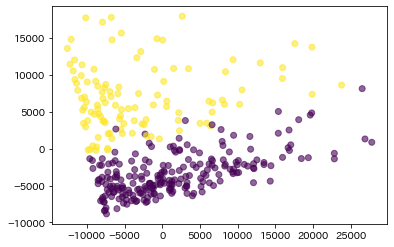

In [51]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)